# Unsupervised Machine Learning

Unsupervised learning is used when the target variable is **not present** in the dataset. Models are trained to find clusters and patterns from the data.

## AIM: To apply clustering over the Iris dataset predict the optimum number of clusters and represent them visually


## Name: Shatakshi Shukla

# K Means Clustering

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # To visualize data using 3D plots and Boxplots
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Load Dataset

In [2]:
data=pd.read_csv('Iris.csv')

## Data Appearance

In [3]:
data.head() # Returns top 5 rows by default

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Since, Id column has no significance in our model building, hence, we can drop that column

In [4]:
data.drop(['Id'], axis=1, inplace=True) # "inplace" reinitializes the ouput to the "data" variable

## Dataset Shape

In [5]:
data.shape

(150, 5)

## Classes Count

In [6]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Data consists of 3 classes with 50 points each.

## Checking Null Values


In [7]:
data.isna().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

## Checking Duplicate Entries in Data

In [8]:
data.duplicated().any()

True

## Data Description

In [9]:
data.describe() # Returns data columns statistical properties

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1. Data has 150 rows of 3 classes.
2. Mean and median are almost similar for all features. So, they are normally distributed but varied kurtosis due to the variable standard deviation.

### Plotting data

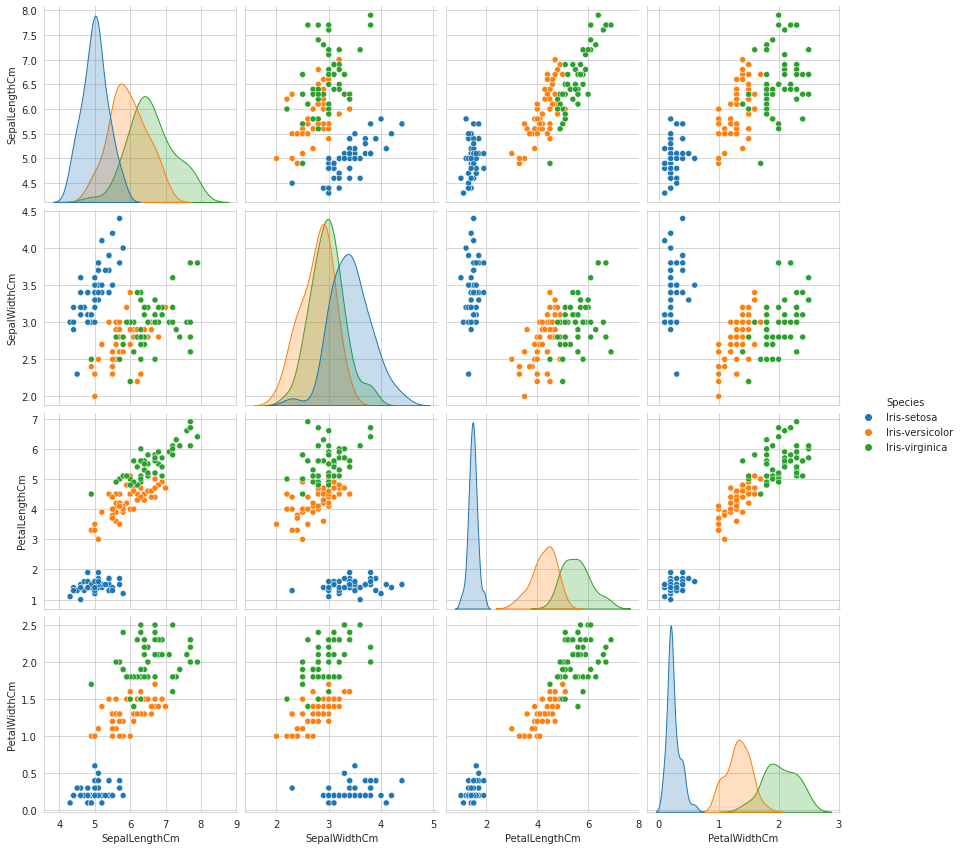

In [10]:
sns.set_style("whitegrid"); # This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
sns.pairplot(data, hue="Species", height=3);
plt.show()

1. Iris-setosa class is quite separable in all features provided.
2. Iris-versicolor and Iris virginica can be seen with some overlap.
3. Petal features provide more clear boundaries between classes than Sepal features.
4. Sepal width does not provide clear distinction between Iris-viginica and Iris-versicolor at all


## Box Plots to Examine Outliers and Extent of Overlap for Inter Quartile Range

Inter Quartile Range is the range that describes the middle 50% of values when ordered from lowest to highest. It contains most of the data (From 25th percentile to 75th percentile). So, it can show the better picture of distinction among classes.

### Petal Length

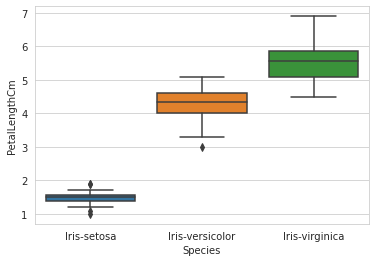

In [11]:
sns.boxplot(x='Species',y='PetalLengthCm', data=data)
plt.show()

### Petal Width

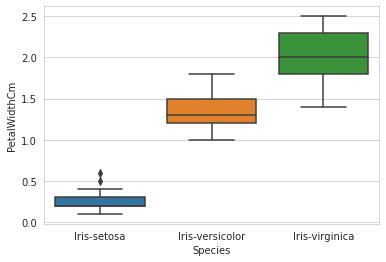

In [12]:
sns.boxplot(x='Species',y='PetalWidthCm', data=data)
plt.show()

The Inter Quartile range is quite separable for all classes for Petal features with Iris setosa class showing some outliers.

### Sepal Length

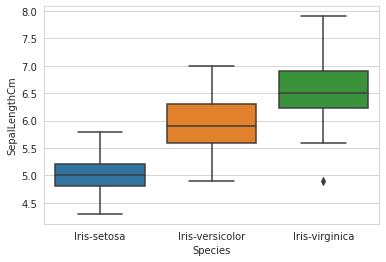

In [13]:
sns.boxplot(x='Species',y='SepalLengthCm', data=data)
plt.show()

### Sepal Width

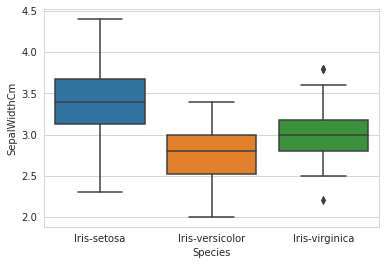

In [14]:
sns.boxplot(x='Species',y='SepalWidthCm', data=data)
plt.show()

1. Sepal width has a lot of overlap between Inter Quartile Range for Iris-versicolor and Iris-virginica.
2. Sepal length does not have that much overlap for Inter Quartile Range.

## Prepare Data for K Means Clustering

In [15]:
x=data.drop(['Species'], axis=1) # Drop target variable to make data suitable for unsupervised learning

In [16]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
X=np.array(x)

## Hyperparameter Tuning

### Find Inertia for Clusters (Intra-Cluster Sum of Sqaures from Centroid)

In [18]:
loss = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    loss.append(kmeans.inertia_) # Intra-cluster distance from centroid

### Find Optimal Number of Clusters using Elbow method

In elbow method, we choose the cluster using point of inflection. This means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

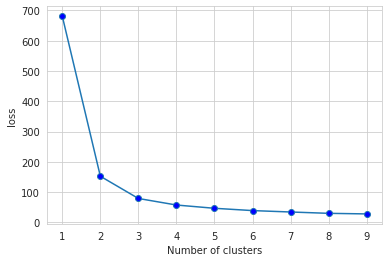

In [19]:
plt.plot(range(1,10),loss, marker='o', markerfacecolor='blue')
plt.xlabel("Number of clusters")
plt.ylabel("loss")
plt.show()

From above plot it is visible that our elbow point is 3 hence, number of clusters are 3.

## K Means Training

In [20]:
kmeans_new=KMeans(n_clusters=3) # Initialize K Means object with 3 clusters

In [21]:
kmeans_new.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## K Means Predictions

In [22]:
y_predict=kmeans_new.predict(x) # Predict to visualize clusters

## Cluster Visualization

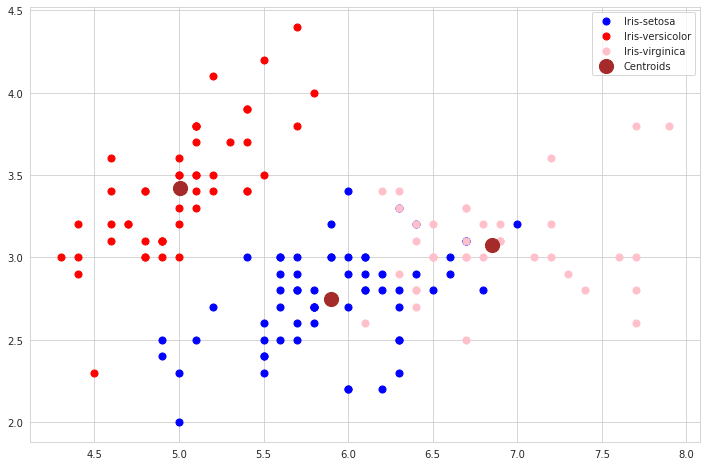

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_predict == 0,0], X[y_predict== 0,1], c='blue', s=50, label='Iris-setosa')
plt.scatter(X[y_predict == 1,0], X[y_predict== 1,1], c='red', s=50, label='Iris-versicolor')
plt.scatter(X[y_predict == 2,0], X[y_predict== 2,1], c='pink', s=50, label='Iris-virginica')
plt.scatter(kmeans_new.cluster_centers_[:,0], kmeans_new.cluster_centers_[:,1], c='brown', s=200, label='Centroids')
plt.legend()
plt.show()

## Inference: We get a clear boundaries between clusters with some overlap between Iris-virginica and Iris-versicolor.